In [510]:
%%html
<style>
table {float:left}
</style>

In [518]:
plt.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

## 前提条件と初期設定
　 | Version
:-- | :--
`Python` | `3.6.10`
`NumPy` | `1.18.1`
`pandas` | `1.0.3`
`matplotlib` | `3.1.3`
`seaborn` | `0.10.1`

In [370]:
import platform
print(f'Python: {platform.python_version()}')
print(f'NumPy: {np.__version__}')
print(f'pandas: {pd.__version__}')
print(f'matplotlib: {mpl.__version__}')
print(f'seaborn: {sns.__version__}')

Python: 3.6.10
NumPy: 1.18.1
pandas: 1.0.3
matplotlib: 3.1.3
seaborn: 0.10.1


### モジュールのインストール

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォントの設定
mpl.font_manager._rebuild()
plt.rcParams['font.family'] = 'IPAexGothic'

# Jupyter Notebookに描画する
%matplotlib inline

### 目的で選ぶ可視化スタイル
1. データ解析中の「データ探索」が目的
2. データ解析後の「とりあえず共有」が目的
3. データ解析後の「自分流に作り込んで共有」が目的

今回取り上げるのは、3番の「自分流に作り込む」方法

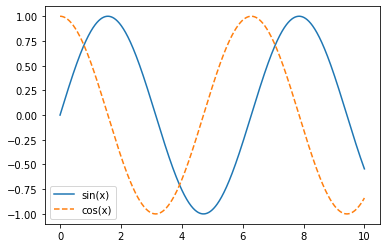

In [519]:
fig, ax = plt.subplots()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)', ls='--')

ax.legend()
plt.savefig(fname='mpl_1-2.jpg', bbox_inches='tight', dpi=72, facecolor=fig.get_facecolor())

#### データ探索が目的→seaborn.set
- [seaborn.set](https://seaborn.pydata.org/generated/seaborn.set.html), return: `None`

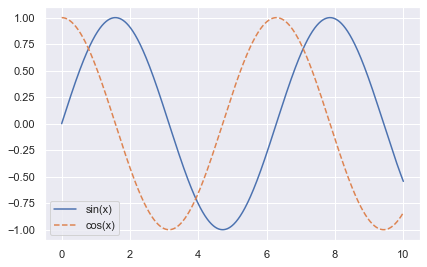

In [517]:
import seaborn as sns; sns.set()

fig, ax = plt.subplots()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)', ls='--')

ax.legend()
plt.savefig(fname='mpl_1-2-1.jpg', bbox_inches='tight', dpi=72, facecolor=fig.get_facecolor())

#### とりあえず共有が目的→matplotlib.style.use
- [matplotlib.style.use](https://matplotlib.org/api/style_api.html#matplotlib.style.use), return: `None`

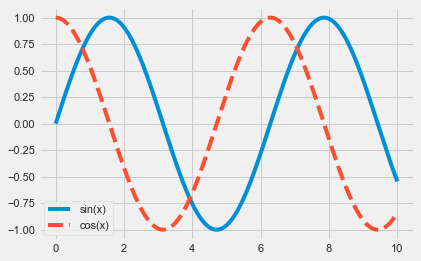

In [516]:
mpl.style.use(style='fivethirtyeight')

fig, ax = plt.subplots()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)', ls='--')

ax.legend()
plt.savefig(fname='mpl_1-2-2.jpg', bbox_inches='tight', dpi=72, facecolor=fig.get_facecolor())

Params | Type | Desc
:-- | :-- | :--
`style` | `{'fivethirtyeight', 'bmh', 'ggplot', …}` | 適用するスタイルシートを指定。ギャラリーは[こちら](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)から

#### 自分流に作り込んで共有が目的→???
1.  土台を作成する
2.  プロットする
3.  注釈を入れる
4.  見た目を整える

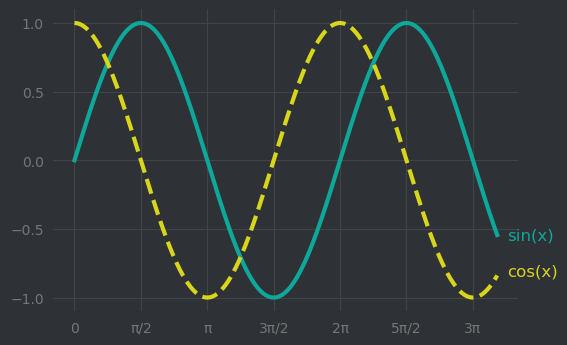

In [535]:
"""
1. 土台を作成する
"""
fig, ax = plt.subplots(dpi=100, facecolor='#2E3236', subplot_kw=dict(facecolor='#2E3236'))


"""
2. プロットする
"""
x = np.linspace(0, 10, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

viz1 = ax.plot(x, y1, lw=3, c='#0EA89B', label='sin(x)')
viz2 = ax.plot(x, y2, lw=3, c='#D9D51A', ls='--', label='cos(x)')


"""
3. 注釈を入れる
"""
# x軸のデータ範囲から0.025%引いた座標軸に凡例を表示
xmin, xmax = ax.get_xlim()
x_position = xmax-((xmax-xmin)/100)*2.5

ax.text(x=x_position, y=y1[-1], s=viz1[0].get_label(), va='center', c=viz1[0].get_color(), size=12)
ax.text(x=x_position, y=y2[-1], s=viz2[0].get_label(), c=viz2[0].get_color(), size=12)


"""
４. 見た目を整える
"""
# 不要な枠線を消す
[ax.spines[i].set(visible=False) for i in ['right', 'top', 'left', 'bottom']]

# グリッド線の装飾
ax.grid(c='#434343')

# x軸目盛をπ/2刻みにする
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(np.pi/2))

# y軸目盛を0.5の倍数刻みにする
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))

# π/2刻みの目盛のフォーマット
def format_func(value, tick_number):
    N = int(np.round(2*value/np.pi))
    if N==0:
        return '0'
    elif N==1:
        return r'$\pi/2$'
    elif N==2:
        return r'$\pi$'
    elif N%2>0:
        return r'${0}\pi/2$'.format(N)
    else:
        return r'${0}\pi$'.format(N//2)
    
# 目盛ラベルを任意のカスタム表記に変更
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_func))

# 目盛の装飾
ax.tick_params(left=False, bottom=False)
ax.tick_params(labelcolor='#767676')

plt.savefig(fname='mpl_1-2-3.jpg', bbox_inches='tight', dpi=72, facecolor=fig.get_facecolor())

### 名称の確認

### インターフェースの流儀

## 土台を作成する

### fig, ax = plt.subplots()
- [matplotlib.pyplot.subplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html), return: [Figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure), [axes.Axes](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.figure.Figure.tight_layout](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.tight_layout), return: `None`

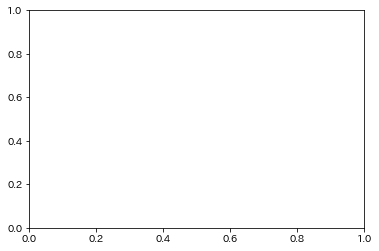

In [202]:
fig, ax = plt.subplots()

Params | Type | Desc
:-- | :-- | :--
nrows=1| int | Figureを縦にn分割
ncols=1 | int | Figureを横にn分割
sharex=False | bool | nrowsで分割したAxesのx軸を共通化
sharey=False | bool | ncolsで分割したAxesのy軸を共通化
**fig_kw |  | [pyplot.figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure)パラメータ(Figure)を直接指定
subplot_kw=None | dict | [add_subplot](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot)パラメータ(Axes)を辞書形式で指定
|
figsize=(6, 4) | (float, float) | アスペクト比(432x288)
dpi=72 | int | 解像度
facecolor=None | color | 図の背景色
|
facecolor='w' | color | 座標軸の背景色、fcでも可
xmargin=0.05 | float | 図と座標軸の横の余白(-0.5以上)
ymargin=0.05 | float | 図と座標軸の縦の余白(-0.5以上)

#### アスペクト比を変更

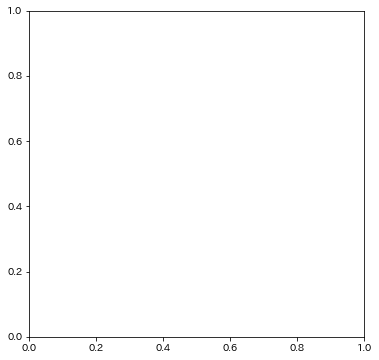

In [207]:
fig, ax = plt.subplots(figsize=(6, 6))

#### 解像度を変更

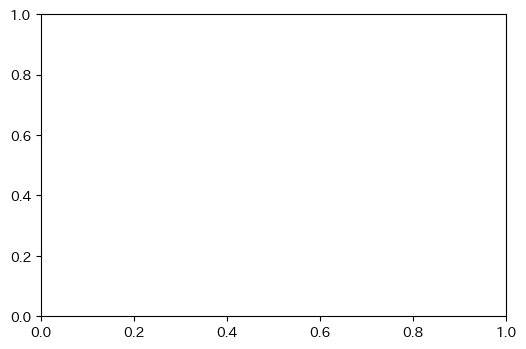

In [208]:
fig, ax = plt.subplots(dpi=100)

#### 背景色を変更

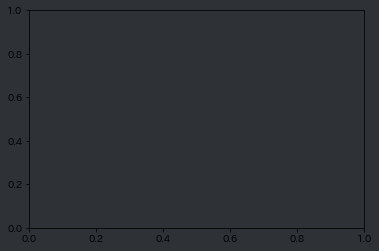

In [206]:
fig, ax = plt.subplots(facecolor='#2E3236', subplot_kw=dict(facecolor='#2E3236'))

####  座標軸を分割する

Text(0.5, 0.5, 'ax[1]')

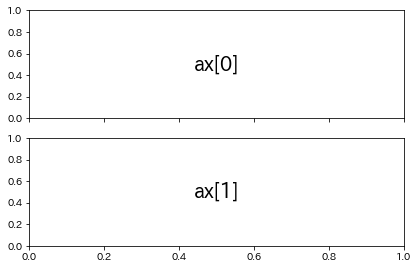

In [218]:
# 縦に２分割
fig, ax = plt.subplots(nrows=2, sharex=True)
fig.tight_layout(rect=[0, 0, 1, 0.96])

ax[0].text(x=0.5, y=0.5, s='ax[0]', ha='center', va='center', fontsize=20)
ax[1].text(x=0.5, y=0.5, s='ax[1]', ha='center', va='center', fontsize=20)

Text(0.5, 0.5, 'ax[1]')

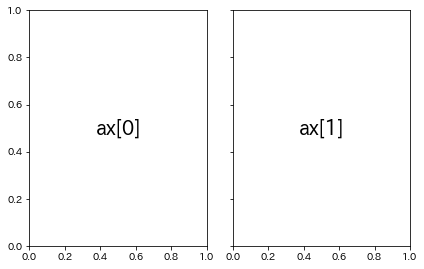

In [219]:
# 横に２分割
fig, ax = plt.subplots(ncols=2, sharey=True)
fig.tight_layout(rect=[0, 0, 1, 0.96])

ax[0].text(x=0.5, y=0.5, s='ax[0]', ha='center', va='center', fontsize=20)
ax[1].text(x=0.5, y=0.5, s='ax[1]', ha='center', va='center', fontsize=20)

Text(0.5, 0.5, 'ax[1][1]')

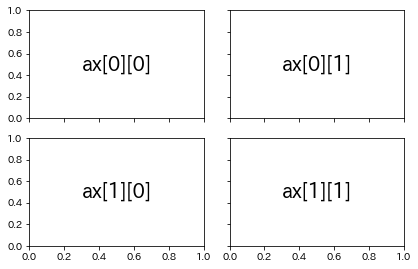

In [223]:
# 縦横に２分割
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
fig.tight_layout(rect=[0, 0, 1, 0.96])

ax[0][0].text(x=0.5, y=0.5, s='ax[0][0]', ha='center', va='center', fontsize=20)
ax[0][1].text(x=0.5, y=0.5, s='ax[0][1]', ha='center', va='center', fontsize=20)
ax[1][0].text(x=0.5, y=0.5, s='ax[1][0]', ha='center', va='center', fontsize=20)
ax[1][1].text(x=0.5, y=0.5, s='ax[1][1]', ha='center', va='center', fontsize=20)

### グリッドレイアウト

- [matplotlib.pyplot.figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html), return: [Figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure)
- [matplotlib.figure.Figure.add_subplot](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot), return: [axes.SubplotBase](https://matplotlib.org/api/_as_gen/matplotlib.axes.SubplotBase.html) or [axes.Axes](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.gridspec.GridSpec](https://matplotlib.org/api/_as_gen/matplotlib.gridspec.GridSpec.html), return: `None`
- [matplotlib.gridspec.GridSpecFromSubplotSpec](https://matplotlib.org/api/_as_gen/matplotlib.gridspec.GridSpecFromSubplotSpec), return: `None`

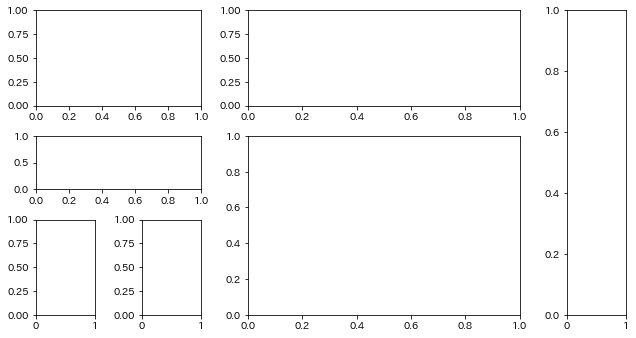

In [127]:
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

fig = plt.figure(figsize=(9, 5))

gs_master = GridSpec(
    nrows=8,
    ncols=12,
    height_ratios=np.ones(8, dtype=int),
    width_ratios=np.ones(12, dtype=int),
)

ax1 = fig.add_subplot(GridSpecFromSubplotSpec(nrows=3, ncols=4, subplot_spec=gs_master[0:3, 0:4])[:, :])
ax2 = fig.add_subplot(GridSpecFromSubplotSpec(nrows=3, ncols=6, subplot_spec=gs_master[0:3, 4:10])[:, :])
ax3 = fig.add_subplot(GridSpecFromSubplotSpec(nrows=8, ncols=2, subplot_spec=gs_master[0:, 10:])[:, :])
ax4 = fig.add_subplot(GridSpecFromSubplotSpec(nrows=2, ncols=4, subplot_spec=gs_master[3:5, 0:4])[:, :])
ax5 = fig.add_subplot(GridSpecFromSubplotSpec(nrows=6, ncols=5, subplot_spec=gs_master[3:, 4:10])[:, :])
ax6 = fig.add_subplot(GridSpecFromSubplotSpec(nrows=3, ncols=2, subplot_spec=gs_master[5:, 0:2])[:, :])
ax7 = fig.add_subplot(GridSpecFromSubplotSpec(nrows=3, ncols=2, subplot_spec=gs_master[5:, 2:4])[:, :])

fig.tight_layout(rect=[0, 0, 1, 0.96])

## プロットする

## 注釈を入れる

### タイトル

- [matplotlib.figure.Figure.suptitle](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.suptitle), return: [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text), **kwargs: [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text)
- [matplotlib.figure.Figure.tight_layout](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.tight_layout), return: `None`
- [matplotlib.axes.Axes.set_title](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_title.html), return: [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text), **kwargs: [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text)
- [matplotlib.axes.Axes.set_xlabel](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html), return: `None`, **kwargs: [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text)
- [matplotlib.axes.Axes.set_xlabel](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html), return: `None`, **kwargs: [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text)

#### 図のタイトル

Text(0.5, 0.98, 'Figure Title')

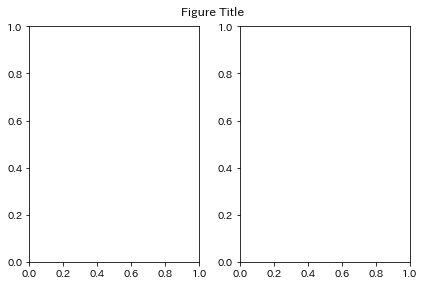

In [123]:
fig, ax = plt.subplots(ncols=2)
fig.tight_layout(rect=[0, 0, 1, 0.96])

fig.suptitle(t='Figure Title')

#### 座標軸のタイトル

Text(1.0, 1.0, 'ax[1]タイトル')

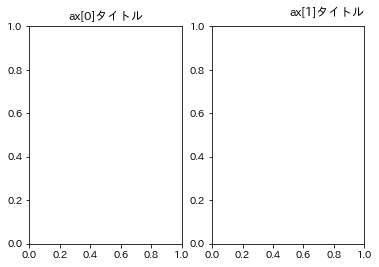

In [124]:
fig, ax = plt.subplots(ncols=2)

ax[0].set_title(label='ax[0]タイトル')
ax[1].set_title(label='ax[1]タイトル', loc='right', pad=10)

# label: str
# loc: {'left', 'center', 'right'} default: 'center'
# pad: float, default: None

#### 軸のラベル

Text(0, 0.5, 'y軸のラベル')

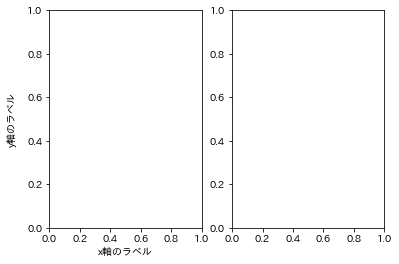

In [125]:
fig, ax = plt.subplots(ncols=2)

ax[0].set_xlabel(xlabel='x軸のラベル', labelpad=None)
ax[0].set_ylabel(ylabel='y軸のラベル', labelpad=10)

# xlabel, ylabel: str
# labelpad: float, default: None

### 凡例

- [matplotlib.axes.Axes.legend](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.legend.html), return: [Legend](https://matplotlib.org/api/legend_api.html#matplotlib.legend.Legend)

#### 凡例を表示

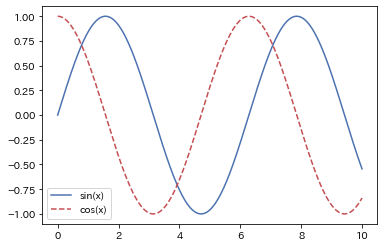

In [344]:
fig, ax= plt.subplots()

x = np.linspace(0, 10, 1000)

# y=sin(x)をプロット
y1 = np.sin(x)
ax.plot(x, y1, '-b', label='sin(x)')

# y=cos(x)をプロット
y2 = np.cos(x)
ax.plot(x, y2, '--r', label='cos(x)')

ax.legend(loc='best')

#### 凡例をプロットのそばに表示

Text(10.225, -0.8390715290764524, 'cos(x)')

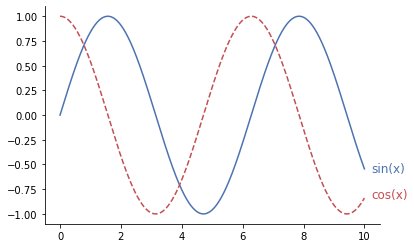

In [369]:
fig, ax= plt.subplots()

x = np.linspace(0, 10, 1000)

# y=sin(x)をプロット
y1 = np.sin(x)
viz1 = ax.plot(x, y1, '-b', label='sin(x)')

# y=cos(x)をプロット
y2 = np.cos(x)
viz2 = ax.plot(x, y2, '--r', label='cos(x)')

# 不要な枠線を消す
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# x軸のデータ範囲から0.025%引いた座標軸に凡例を表示
xmin, xmax = ax.get_xlim()
x_position = xmax-((xmax-xmin)/100)*2.5

ax.text(x=x_position, y=y1[-1], s=viz1[0].get_label(), va='center', c=viz1[0].get_color(), size=12)
ax.text(x=x_position, y=y2[-1], s=viz2[0].get_label(), c=viz2[0].get_color(), size=12)

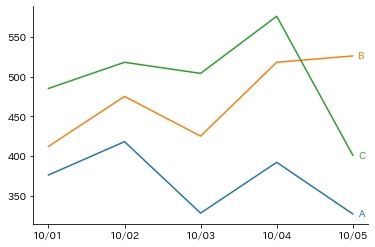

In [471]:
fig, ax= plt.subplots()

df = pd.DataFrame(
    data = {
        'A': [376, 418, 328, 392, 327],
        'B': [412, 475, 425, 518, 526],
        'C': [485, 518, 504, 576, 401]
    },
    index = ['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04', '2019-10-05']
)
df.index = pd.to_datetime(df.index)

x = df.index

# 不要な枠線を消す
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# x軸の目盛をindexの数と同じにする
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(len(df.index)))

# 目盛ラベルを任意の日時表記に変更
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m/%d'))

# 時系列グラフをまとめてプロットする
for _, col in enumerate(df.columns):
    viz = ax.plot(x, df[col])
    
    # x軸のデータ範囲から0.03%引いた座標軸に凡例を表示
    xmin, xmax = ax.get_xlim()
    x_position = xmax-((xmax-xmin)/100)*3

    ax.text(x=x_position, y=df[col][-1], s=col, va='center', c=viz[0].get_color())

### テキストと矢印

- [matplotlib.figure.Figure.text](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.text), return: [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text), **kwargs: [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text)
- [matplotlib.axes.Axes.text](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.text.html), return: [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text), **kwargs: [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text)
- [matplotlib.axes.Axes.annotate](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.annotate.html), return: [Annotation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.annotate.html), **kwargs: [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text)

#### テキストのみ

Text(0.5, 0.6, '. Figure: (0.5, 0.6)')

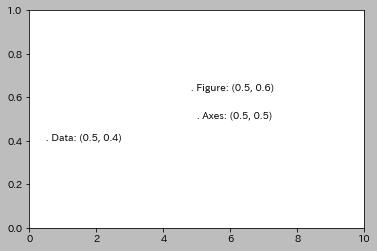

In [85]:
fig, ax= plt.subplots(facecolor='#BDBDBD')

# x軸の幅を変更
ax.set_xlim(left=0, right=10)

# データ座標軸に関連付けられた変換
ax.text(x=0.5, y=0.4, s='. Data: (0.5, 0.4)', transform=ax.transData)

# 座標軸に関連付けられた変換
ax.text(x=0.5, y=0.5, s='. Axes: (0.5, 0.5)', transform=ax.transAxes)

# 図に関連付けられた変換(axesが１つのとき)
ax.text(x=0.5, y=0.6, s='. Figure: (0.5, 0.6)', transform=fig.transFigure)

# 図に関連付けられた変換(axesが２つ以上のとき)
# fig.text(x=0.5, y=0.5, s='. Figure: (0.5, 0.6)')

#### テキストと矢印

Text(0.2, 0.5, 'テキスト')

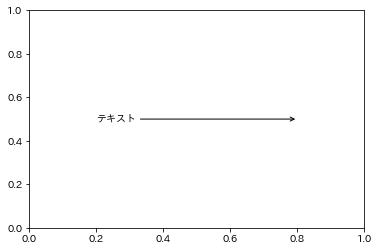

In [112]:
fig, ax= plt.subplots()

kwargs = {'va': 'center'}
ax.annotate(s='テキスト', xy=(0.8, 0.5), xytext=(0.2, 0.5), arrowprops={'arrowstyle': '->'}, **kwargs)

Text(0.2, 0.5, '')

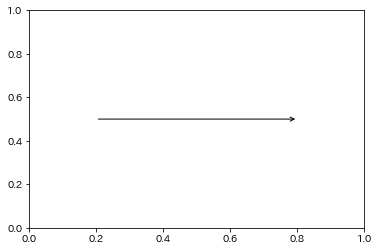

In [113]:
fig, ax= plt.subplots()

# 矢印のみ
ax.annotate(s='', xy=(0.8, 0.5), xytext=(0.2, 0.5), arrowprops={'arrowstyle': '->'})

### 補助線を引く

#### グリッド線を引く
- [matplotlib.axes.Axes.grid](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.grid.html), return: `None`, **kwargs: [Line2D](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html)

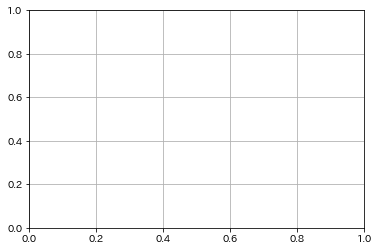

In [243]:
fig, ax = plt.subplots()
ax.grid()

Params | Type | Desc
:-- | :-- | :--
b=False | bool | グリッド線を表示するかどうか
which='major' | {'major', 'minor', 'both'} | 変更を適用するグリッド線
axis='both' | {'both', 'x', 'y'} | 変更を適用する軸
**kwargs |  | [Line2D](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html)パラメータを直接指定
|
alpha | float | 透過率(0~1)
color | color | グリッド線の色、cでも可
linestyle | {'-', '--', '-.', ':', ''} | グリッド線の種類、lsでも可
linewidth | float | グリッド線の大きさ、lwでも可
zorder | float | 重なり順

#### 座標軸に垂直な線を引く
- [matplotlib.axes.Axes.axvline](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axvline.html), return: [Line2D](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html), **kwargs: [Line2D](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html)

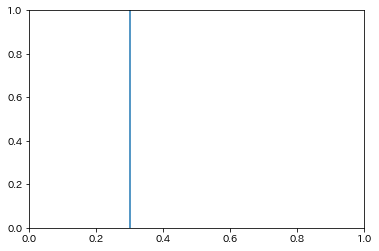

In [259]:
fig, ax = plt.subplots()
ax.axvline(x=0.3)

Params | Type | Desc
:-- | :-- | :--
x=0 | scalar | 垂直線のデータ座標でのx軸の位置
ymin=0 | scalar | 垂直線の下端の位置(0〜1)を指定
ymax=1 | scalar | 垂直線の上端の位置(0〜1)を指定
**kwargs |  | [Line2D](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html)パラメータを直接指定
|
alpha=None | float | 透過率(0~1)
color='C0' | color | 垂直線の色、cでも可
linestyle='-' | {'-', '--', '-.', ':', ''} | 垂直線の種類、lsでも可
linewidth=1.5 | float | 垂直線の大きさ、lwでも可
zorder=2 | float | 重なり順

#### 座標軸に並行な線を引く
- [matplotlib.axes.Axes.axhline](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axhline.html), return: [Line2D](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html), **kwargs: [Line2D](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html)

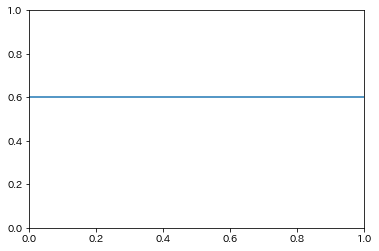

In [260]:
fig, ax= plt.subplots()
ax.axhline(y=0.6)

Params | Type | Desc
:-- | :-- | :--
y=0 | scalar | 並行線のデータ座標でのx軸の位置
xmin=0 | scalar | 並行線の左端の位置(0〜1)を指定
xmax=1 | scalar | 並行線の右端の位置(0〜1)を指定
**kwargs |  | [Line2D](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html)パラメータを直接指定
|
alpha=None | float | 透過率(0~1)
color='C0' | color | 並行線の色、cでも可
linestyle='-' | {'-', '--', '-.', ':', ''} | 並行線の種類、lsでも可
linewidth=1.5 | float | 並行線の大きさ、lwでも可
zorder=2 | float | 重なり順

### 指定領域の塗りつぶし
- [matplotlib.axes.Axes.fill_between](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.fill_between.html), return: [PolyCollection](https://matplotlib.org/api/collections_api.html#matplotlib.collections.PolyCollection), **kwargs: [Polygon](https://matplotlib.org/api/_as_gen/matplotlib.patches.Polygon.html)

alpha=None
facecolor=[[0.12156863 0.46666667 0.70588235 1.        ]]
zorder=1


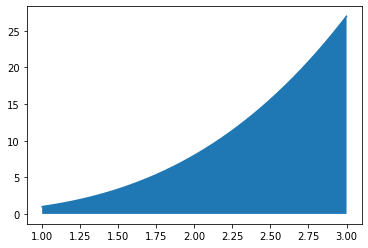

In [400]:
fig, ax= plt.subplots()

# y = x^3 をプロット
x = np.linspace(1, 3, 1000)
y = x**3
ax.plot(x, y)

viz = ax.fill_between(x=x, y1=y)

print(f'alpha={viz.get_alpha()}')
print(f'facecolor={viz.get_facecolor()}')
print(f'zorder={viz.get_zorder()}')

Params | Type | Desc
:-- | :-- | :--
x | array | a
y1 | array or scalar | a
y2=0 | array or scalar | a
where | array of bool | a
**kwargs |  | [Polygon](https://matplotlib.org/api/_as_gen/matplotlib.patches.Polygon.html)パラメータを直接指定
|
alpha=None | float | 透過率(0~1)
facecolor='#1F77B4' | color | 塗りつぶしの色、fcでも可
zorder=1 | float | 重なり順

#### チャートと軸の間を塗りつぶす

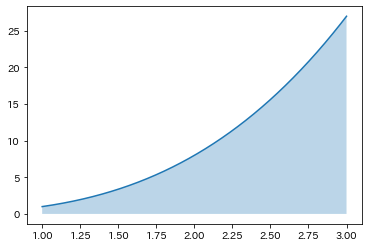

In [218]:
fig, ax= plt.subplots()

# y = x^3 をプロット
x = np.linspace(1, 3, 1000)
y = x**3
ax.plot(x, y)

ax.fill_between(x=x, y1=y, alpha=0.3)

#### ２つのチャート間を塗りつぶす

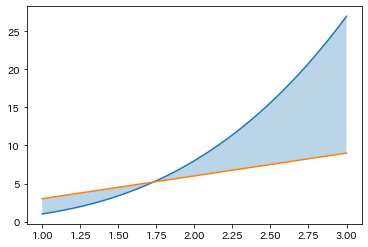

In [223]:
fig, ax= plt.subplots()

# y = x^3 をプロット
x = np.linspace(1, 3, 1000)
y1 = x**3
ax.plot(x, y1)

# y = x*3 をプロット
x = np.linspace(1, 3, 1000)
y2 = x*3
ax.plot(x, y2)


ax.fill_between(x=x, y1=y1, y2=y2, alpha=0.3)

#### 領域に条件を指定して塗りつぶす

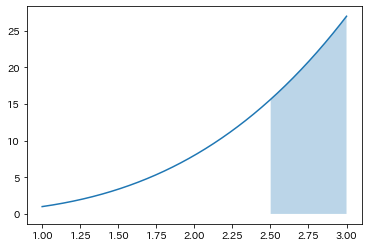

In [230]:
fig, ax= plt.subplots()

# y = x^3 をプロット
x = np.linspace(1, 3, 1000)
y = x**3
ax.plot(x, y)

ax.fill_between(x=x, y1=y, where=(x>=2.5), alpha=0.3)

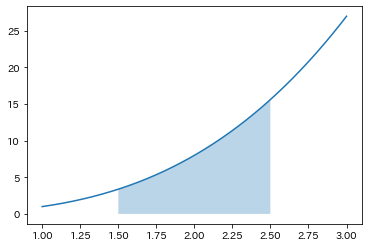

In [233]:
# AND
fig, ax= plt.subplots()

# y = x^3 をプロット
x = np.linspace(1, 3, 1000)
y = x**3
ax.plot(x, y)

ax.fill_between(x=x, y1=y, where=((x>=1.5)&(x<=2.5)), alpha=0.3)

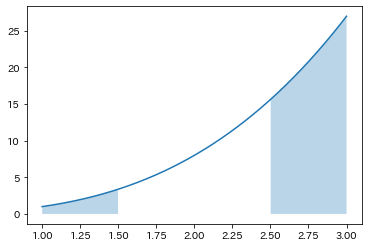

In [234]:
# OR
fig, ax= plt.subplots()

# y = x^3 をプロット
x = np.linspace(1, 3, 1000)
y = x**3
ax.plot(x, y)

ax.fill_between(x=x, y1=y, where=((x<=1.5)|(x>=2.5)), alpha=0.3)

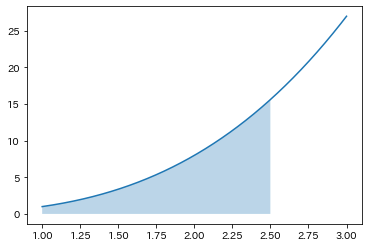

In [235]:
# NOT
fig, ax= plt.subplots()

# y = x^3 をプロット
x = np.linspace(1, 3, 1000)
y = x**3
ax.plot(x, y)

ax.fill_between(x=x, y1=y, where=~(x>=2.5), alpha=0.3)

### 図形を描画

## 見た目を調整する

### 枠線(Spines)
- [matplotlib.spines.Spine](https://matplotlib.org/api/spines_api.html#matplotlib.spines.Spine), return: `None`
- [matplotlib.axes.Axes.axis](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axis.html), return: `(xmin, xmax, ymin, ymax)`

alpha=None
edgecolor=[0. 0. 0. 1.]
linestyle=solid
linewidth=0.8
visible=True
zorder=2.5


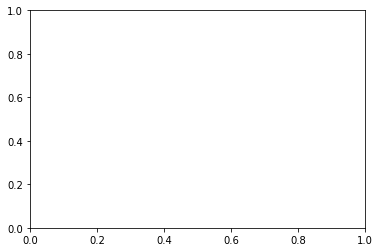

In [455]:
fig, ax = plt.subplots()

viz = ax.spines['left']

print(f'alpha={viz.get_alpha()}')
# print(f'facecolor={np.array(list(viz.get_facecolor()))*[255, 255, 255, 1]}')
print(f'edgecolor={np.array(list(viz.get_edgecolor()))*[255, 255, 255, 1]}')
# print(f'color={np.array(list(viz.get_color()))*[255, 255, 255, 1]}')
print(f'linestyle={viz.get_linestyle()}')
print(f'linewidth={viz.get_linewidth()}')
print(f'visible={viz.get_visible()}')
print(f'zorder={viz.get_zorder()}')

Params | Type | Desc
:-- | :-- | :--
`**kwargs` |  | 
|
`alpha=None` | `float` | 枠線の透過率(`0〜1`)
`edgecolor='#000000'` | `color` | 枠線の色、`ec`でも可
`linestyle='-'` | `{'-', '--', '-.', ':', ''}` | 枠線の種類、`ls`でも可
`linewidth=0.8` | `float` | 枠線の幅、`lw`でも可
`visible=True` | `bool` | 枠線を表示するか
`zorder=2.5` | `float` | 重なり順

#### 枠線を消す

[None]

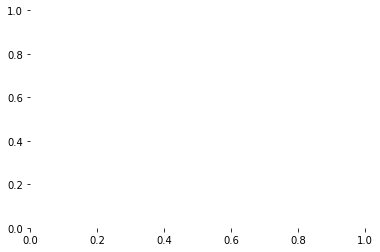

In [460]:
fig, ax = plt.subplots()

# 枠線を消す
ax.spines['left'].set(visible=False)        # 左
ax.spines['right'].set(visible=False)      # 右
ax.spines['bottom'].set(visible=False) # 下
ax.spines['top'].set(visible=False)        # 上

# 枠線を全て消す
# [ax.spines[i].set(visible=False) for i in ['left', 'right', 'top', 'bottom']]

(0.0, 1.0, 0.0, 1.0)

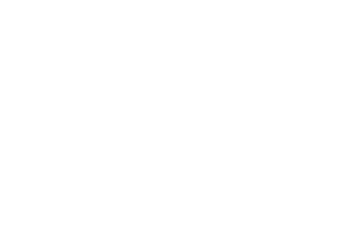

In [341]:
fig, ax = plt.subplots()

# 枠線と目盛、目盛ラベルを全て消す
ax.axis('off')

#### 枠線色を変更

[None]

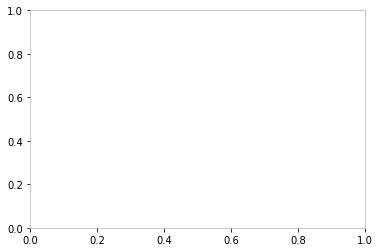

In [461]:
fig, ax = plt.subplots()

# 枠線色を変更
ax.spines['left'].set(edgecolor='#BDBDBD')        # 左
ax.spines['right'].set(edgecolor='#BDBDBD')      # 右
ax.spines['bottom'].set(edgecolor='#BDBDBD') # 下
ax.spines['top'].set(edgecolor='#BDBDBD')        # 上

# 全ての枠線色を変更
# [ax.spines[i].set(edgecolor='#BDBDBD') for i in ['left', 'right', 'top', 'bottom']]

### 余白(Margin)
- [matplotlib.axes.Axes.margins](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.margins.html), return: `(xmargin, ymargin)`
> 値を指定すると戻り値はNoneになる  
> 1 つの位置引数が与えられた場合、それは x 軸と y 軸の両方の限界のマージンを指定します。2 つの位置引数が与えられた場合、それらは xmargin, ymargin と解釈されます。1 つの軸にマージンを設定したい場合は、以下に説明するキーワード引数を使用します。

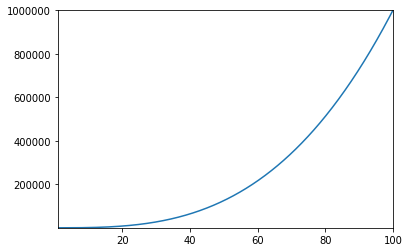

In [502]:
fig, ax = plt.subplots()

# y = x^3 をプロット
x = np.linspace(1, 100, 1000)
y = x**3
ax.plot(x, y)

ax.margins(0)

Params | Type | Desc
:-- | :-- | :--
x=0.05 | float | x軸の余白
y=0.05 | float | y軸の余白

### 軸(Axis)

- [matplotlib.axes.Axes.axis](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axis.html), return: `(xmin, xmax, ymin, ymax)`
- [matplotlib.axes.Axes.get_xlim](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.get_xlim.html), return: `(xmin, xmax)`
- [matplotlib.axes.Axes.get_ylim](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.get_ylim.html), return: `(ymin, ymax)`
- [matplotlib.axes.Axes.set_xlim](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlim.html), return: `(xmin, xmax)`
- [matplotlib.axes.Axes.set_ylim](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ylim.html), return: `(ymin, ymax)`
- [matplotlib.axes.Axes.invert_xaxis](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.invert_xaxis.html), return: `None`
- [matplotlib.axes.Axes.invert_yaxis](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.invert_yaxis.html), return: `None`

#### 軸の幅を取得

0.0 <= x <= 1.0
0.0 <= y <= 1.0


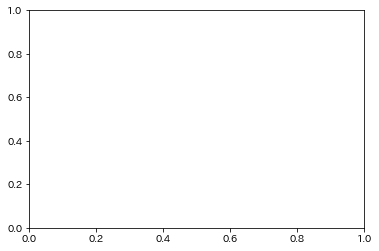

In [384]:
fig, ax = plt.subplots()

# x軸の幅を取得
xmin, xmax = ax.get_xlim()

# y軸の幅を取得
ymin, ymax = ax.get_ylim()

# x,y軸の幅を取得
xmin, xmax, ymin, ymax = ax.axis()

print(f'{xmin} <= x <= {xmax}')
print(f'{ymin} <= y <= {ymax}')

#### 軸の幅を変更

(100, 500)

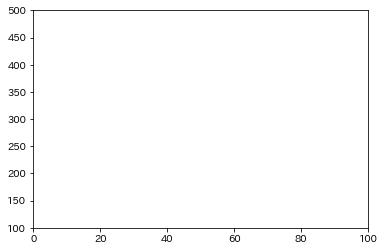

In [386]:
fig, ax = plt.subplots()

# x軸の幅を変更
ax.set_xlim(left=0, right=100)

# y軸の幅を変更
ax.set_ylim(bottom=100, top=500)

#### 軸を反転

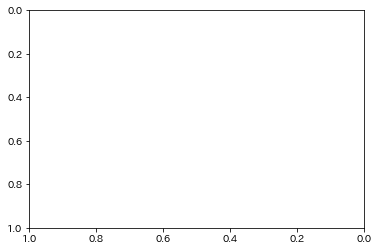

In [23]:
fig, ax = plt.subplots()

# 軸を反転
ax.invert_xaxis() # x軸
ax.invert_yaxis() # y軸

### 目盛の情報を取得

- [matplotlib.axes.Axes.get_xticklabels](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.get_xticklabels.html), return: list of [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text) instances
- [matplotlib.axes.Axes.get_yticklabels](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.get_yticklabels.html), return: list of [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text) instances
- [matplotlib.text.Text.get_position](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.get_position), return: the position of the text as a `tuple`.
- [matplotlib.text.Text.get_text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.get_text), return: `str`

#### 座標を取得

(x, y) = (0.0, 0) 
(x, y) = (0.2, 0) 
(x, y) = (0.4, 0) 
(x, y) = (0.6000000000000001, 0) 
(x, y) = (0.8, 0) 
(x, y) = (1.0, 0) 


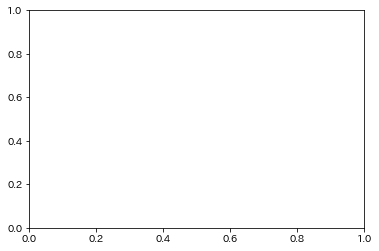

In [142]:
fig, ax = plt.subplots()

# 主目盛のpositionを取得するために必要
fig.canvas.draw()

# x軸の目盛の座標を全て取得
for xtick in ax.get_xticklabels():
    x, y = xtick.get_position()

    print(f'(x, y) = ({x}, {y}) ')

#### 目盛ラベルのテキストを取得

0.0
0.2
0.4
0.6
0.8
1.0


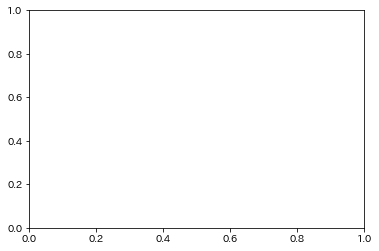

In [143]:
fig, ax = plt.subplots()

# major tickのテキストを取得するために必要
fig.canvas.draw()

# x軸の目盛ラベルのテキストを取得
for ytick in ax.get_yticklabels():
    print(f'{ytick.get_text()}')

### 目盛の増加と削減(Locator)

#### 目盛の最大数を指定(MaxNLocator)

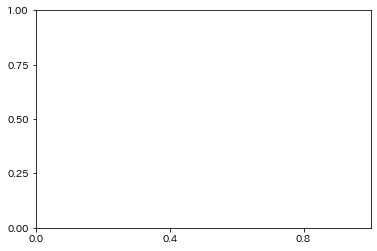

In [180]:
fig, ax = plt.subplots()

# x軸の目盛を最大3つにする
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(3))

# y軸の目盛を最大4つにする
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

#### 等間隔の目盛(LinearLocator)

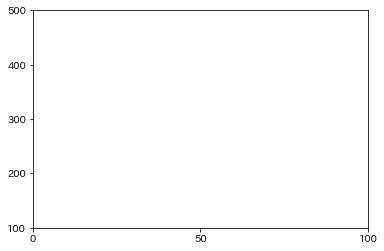

In [178]:
fig, ax = plt.subplots()

# 軸の幅を変更
ax.set_xlim(left=0, right=100)           # x軸
ax.set_ylim(bottom=100, top=500) # y軸

# x軸に等間隔な3本の目盛を引く
ax.xaxis.set_major_locator(mpl.ticker.LinearLocator(3))

# y軸に等間隔な5本の目盛を引く
ax.yaxis.set_major_locator(mpl.ticker.LinearLocator(5))

#### 倍数目盛(MultipleLocator)

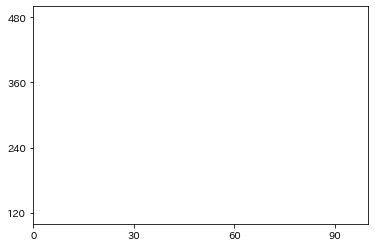

In [179]:
fig, ax = plt.subplots()

# 軸の幅を変更
ax.set_xlim(left=0, right=100)           # x軸
ax.set_ylim(bottom=100, top=500) # y軸

# x軸に30の倍数刻みで目盛を引く
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(30))

# y軸に120の倍数刻みで目盛を引く
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(120))

### 目盛フォーマットの調整(Formatter)

#### フォーマット表記(StrMethodFormatter)

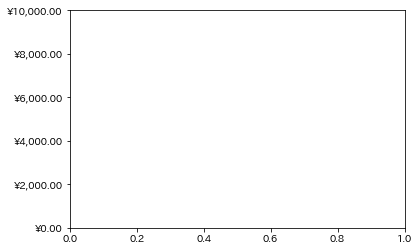

In [389]:
fig, ax = plt.subplots()

ax.set_ylim(bottom=0, top=10000)

# 目盛ラベルを任意のフォーマットに変更
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('¥{x:,.2f}'))

#### パーセント表記(PercentFormatter)

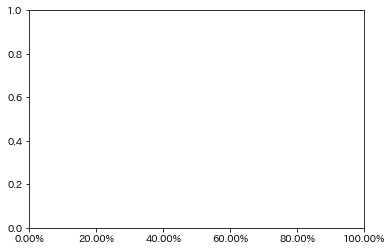

In [181]:
fig, ax = plt.subplots()

# 目盛ラベルをパーセント表記に変更
ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1, decimals=2))

# xmax: 100％に設定する値, default: 100
# decimals: 少数点の設定, default: None
# symbol: 数字の後に設定する文字列, default: '%'

#### 日時表記(DateFormatter)

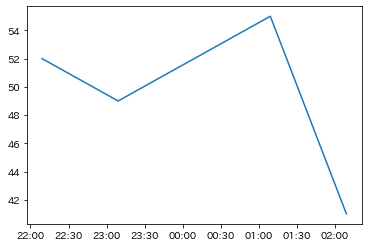

In [182]:
fig, ax = plt.subplots()

s = pd.Series(
    data = [52, 49, 55, 41],
    index = ['2019-12-31 22:09:08', '2019-12-31 23:09:08', '2020-01-01 01:09:08', '2020-01-01 02:09:08']
)

# インデックスを時系列データに変換
s.index = pd.to_datetime(s.index)

x = s.index   # x軸の値
y = s.values # y軸の値

# 時系列グラフをプロットする
ax.plot(x, y)

# 目盛ラベルを任意の日時表記に変更
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M'))

# Datatimeフォーマット一覧(ISO C89 準拠)
# %Y: 4桁の年
# %y: 2桁の年
# %m: 2桁の月
# %d: 2桁の日
# %H: 2桁の時(24時間)
# %I: ２桁の時(12時間)
# %M: 2桁の分
# %S: 2桁の秒
# %w: 曜日を表す整数(0:日曜~6:土曜)
# %U: 1年の週を表す整数(0〜53)。日曜がその週の最初の日
# %W: 1年の週を表す整数(0〜53)。月曜がその週の最初の日
# %F: '%Y-%m-%d'表記
# %D: '%m/%d/%y'表記

#### カスタム表記(FuncFormatter)

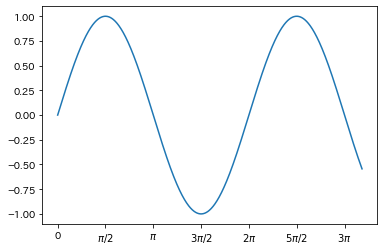

In [184]:
fig, ax = plt.subplots()

# y=sin(x)をプロット
x = np.linspace(0, 10, 1000)
y = np.sin(x)
ax.plot(x, y)

# x軸目盛をπ/2刻みにする
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(np.pi/2))

# π/2刻みの目盛のフォーマットをLaTexで整える
def format_func(value, tick_number):
    N = int(np.round(2*value/np.pi))
    if N==0:
        return '0'
    elif N==1:
        return r'$\pi/2$'
    elif N==2:
        return r'$\pi$'
    elif N%2>0:
        return r'${0}\pi/2$'.format(N)
    else:
        return r'${0}\pi$'.format(N//2)

# 目盛ラベルを任意のカスタム表記に変更
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_func))

### 目盛/目盛ラベルの装飾

- [matplotlib.axes.Axes.tick_params](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.tick_params.html), return: `None`
- [matplotlib.axes.Axes.get_xticklabels](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.get_xticklabels.html), return: list of [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text) instances
- [matplotlib.axes.Axes.get_yticklabels](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.get_yticklabels.html), return: list of [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text) instances
- [matplotlib.text.Text.set_horizontalalignment](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_horizontalalignment), return: `None`
- [matplotlib.text.Text.set_verticalalignment](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_verticalalignment), return: `None`

#### 装飾を適用する軸を選択

In [32]:
ax.tick_params(axis='both') # axis: {'x', 'y', 'both'}; default: 'both'

#### 装飾を適用する目盛を選択

In [33]:
ax.tick_params(which='major') # which: {'major', 'minor', 'both'}; default: 'major'

#### 目盛と目盛ラベルを消す

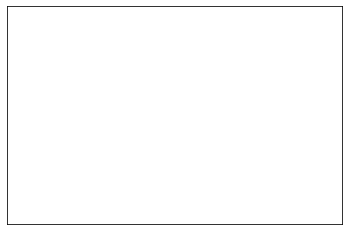

In [167]:
fig, ax = plt.subplots()

# 目盛
ax.tick_params(left=False, bottom=False) # bottom, top, left, rightbool: bool

# 目盛ラベル
ax.tick_params(labelleft=False, labelbottom=False) # labelbottom, labeltop, labelleft, labelright: bool

#### 目盛と目盛ラベルの色を変更

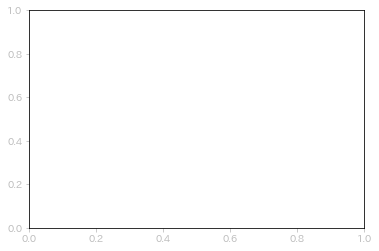

In [169]:
fig, ax = plt.subplots()

# 目盛
ax.tick_params(color='#BDBDBD')

# 目盛ラベル
ax.tick_params(labelcolor='#BDBDBD')

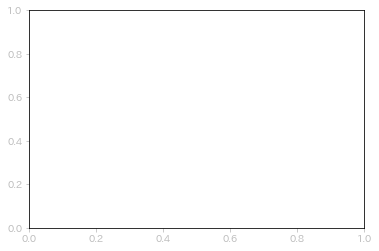

In [170]:
fig, ax = plt.subplots()

# 目盛と目盛ラベルの色をまとめて変更
ax.tick_params(colors='#BDBDBD')

#### 目盛と目盛ラベルの間隔を変更

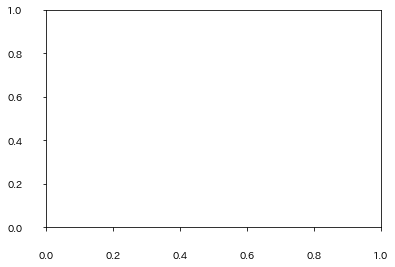

In [37]:
fig, ax = plt.subplots()
ax.tick_params(pad=20) # pad: float

#### 目盛の長さを変更

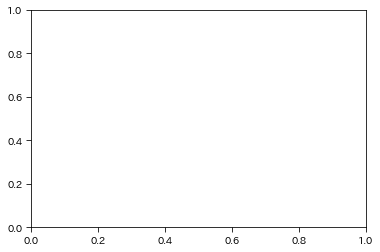

In [38]:
fig, ax = plt.subplots()
ax.tick_params(length=5) # length: float

#### 目盛の幅を変更

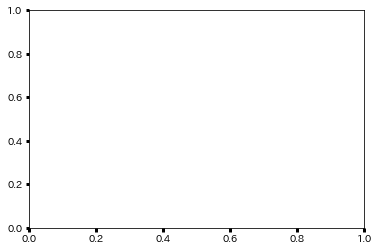

In [39]:
fig, ax = plt.subplots()
ax.tick_params(width=3) # width: float

#### 目盛ラベルの大きさを変更

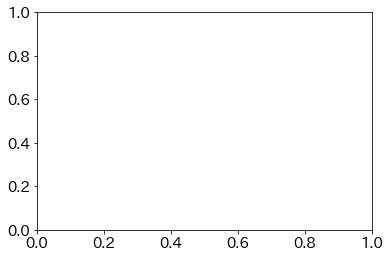

In [40]:
fig, ax = plt.subplots()
ax.tick_params(labelsize=15) # labelsize: float

#### 目盛ラベルの傾きを変更

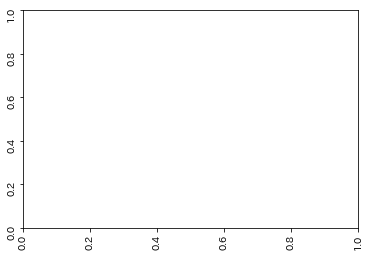

In [41]:
fig, ax = plt.subplots()
ax.tick_params(labelrotation=90) # labelrotation: float

#### 目盛ラベルの位置を変更

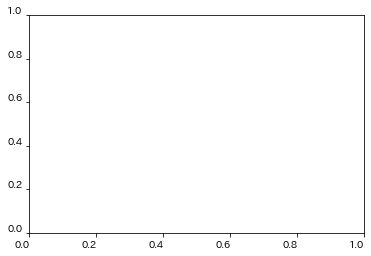

In [158]:
fig, ax = plt.subplots()

# x軸の目盛ラベルを右寄せ
for xtick in ax.get_xticklabels():
    xtick.set_horizontalalignment('right') # {'center', 'right', 'left'}, default: 'center'

# y軸の目盛ラベルを下寄せ
for ytick in ax.get_yticklabels():
    ytick.set_verticalalignment('bottom') # {'top', 'bottom', 'center', 'baseline', 'center_baseline'}, default: 'center'

## 画像出力
- [matplotlib.figure.Figure.savefig](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.savefig), return: `None`

Params | Type | Desc
:-- | :-- | :--
`fname` | `{'jpg', 'png', 'svg', …}` | 保存するファイルのパス、`fig.canvas.get_supported_filetypes()`で保存可能な形式の一覧を表示できる
`bbox_inches=None` | `'tight'` | `%matplotlib inline`と同じスタイルで保存
`dpi=72` | `scalar > 0` | 解像度、`fig`と同じにするには`fig.get_dpi()`を使う
`facecolor='w'` | `color` | 図の背景色、`fig`と同じにするには`fig.get_facecolor()`を使う
`transparent=False` | `bool` | `True`の場合、図を透過して保存する、図や座標軸の背景色が適用されている場合は無視される
`quality=95` | `1 <= scalar <= 100` | jpgの画質を1(最悪)から95(最高)で保存、95より大きい数字は避けるべき

### JPEG/PNG/SVGで保存

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}


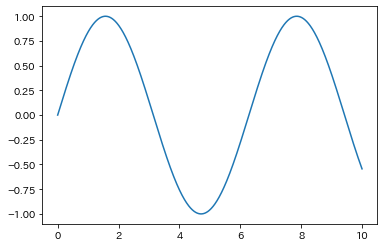

In [3]:
fig, ax = plt.subplots()

x = np.linspace(0, 10, 1000)
y = np.sin(x)
ax.plot(x, y)

# チャートを保存
fig.savefig(fname='sample.jpg') # JPEG
fig.savefig(fname='sample.png') # PNG
fig.savefig(fname='sample.svg') # SVG

from pprint import pprint
pprint(fig.canvas.get_supported_filetypes())

### inline描画と同じスタイルで保存

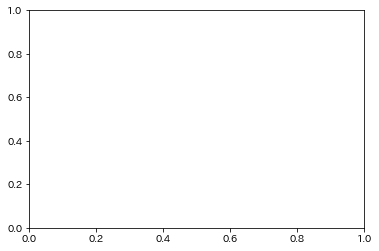

In [14]:
fig, ax = plt.subplots()
plt.savefig(fname='sample.png', bbox_inches='tight')

### 解像度/背景色を変更して保存

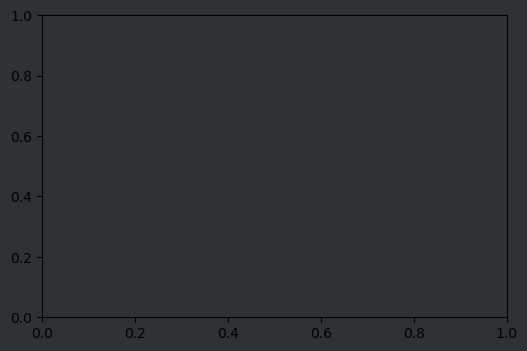

In [524]:
fig, ax = plt.subplots(dpi=100, facecolor='#2E3236')

# 座標軸(Axes)も同じ色で塗りつぶす
ax.set_facecolor(fig.get_facecolor())

plt.savefig(fname='sample.png', dpi=fig.get_dpi(), facecolor=fig.get_facecolor())

### 透過して保存

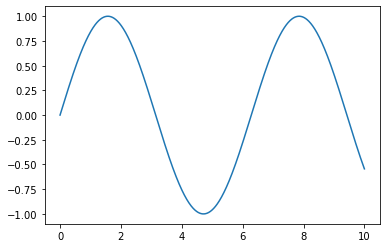

In [530]:
fig, ax = plt.subplots()

# y=sin(x)をプロット
x = np.linspace(0, 10, 1000)
y = np.sin(x)
ax.plot(x, y)

plt.savefig(fname='sample.png', transparent=True)